In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import tensorflow
tensorflow.keras.__version__

'2.5.0'

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [5]:
df.shape

(6991, 41)

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis =1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


[0.12955492 0.16603476 0.12795689 0.05127369 0.01698763 0.01349225
 0.01388972 0.01312174 0.02105048 0.02267009 0.0121011  0.01140337
 0.01019276 0.01687122 0.02965537 0.02740228 0.02134881 0.01225263
 0.01219948 0.01333703 0.01352328 0.01093289 0.01353535 0.0087104
 0.00918672 0.00954724 0.03256368 0.0096299  0.00986675 0.02215719
 0.01785717 0.01137593 0.01136238 0.0152001  0.00902611 0.01184412
 0.00922303 0.01127207 0.01024575 0.01014374]


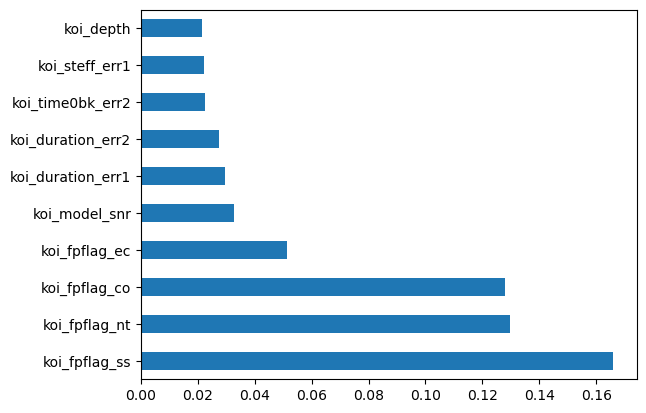

In [7]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data, target)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind= "barh")
plt.show()

In [8]:
# Selected top 10 important features
selected_features = data[['koi_fpflag_ss','koi_fpflag_nt','koi_fpflag_co','koi_fpflag_ec',
                         'koi_model_snr','koi_duration_err1','koi_duration_err2','koi_steff_err1',
                        'koi_time0bk_err1','koi_time0bk_err2']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(selected_features, target, train_size=.2)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.2)

In [10]:
X_train.shape, X_val.shape, X_test.shape

((1398, 10), (1118, 10), (4475, 10))

In [11]:
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [12]:
model.score(X_train, y_train),model.score(X_val, y_val)

(1.0, 0.8846153846153846)

In [13]:
model.score(X_test, y_test)

0.8652513966480447

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [15]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [17]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=10))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))



In [20]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,503
Trainable params: 11,503
Non-trainable params: 0
_________________________________________________________________


In [22]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
35/35 - 1s - loss: 0.8709 - accuracy: 0.5725 - val_loss: 0.6773 - val_accuracy: 0.7607
Epoch 2/100
35/35 - 0s - loss: 0.5353 - accuracy: 0.7522 - val_loss: 0.4213 - val_accuracy: 0.7607
Epoch 3/100
35/35 - 0s - loss: 0.4179 - accuracy: 0.7818 - val_loss: 0.3910 - val_accuracy: 0.8071
Epoch 4/100
35/35 - 0s - loss: 0.4044 - accuracy: 0.7773 - val_loss: 0.3746 - val_accuracy: 0.8286
Epoch 5/100
35/35 - 0s - loss: 0.3895 - accuracy: 0.7898 - val_loss: 0.3695 - val_accuracy: 0.7857
Epoch 6/100
35/35 - 0s - loss: 0.3812 - accuracy: 0.8014 - val_loss: 0.3686 - val_accuracy: 0.8000
Epoch 7/100
35/35 - 0s - loss: 0.3776 - accuracy: 0.7970 - val_loss: 0.3545 - val_accuracy: 0.8286
Epoch 8/100
35/35 - 0s - loss: 0.3735 - accuracy: 0.8050 - val_loss: 0.3597 - val_accuracy: 0.8357
Epoch 9/100
35/35 - 0s - loss: 0.3651 - accuracy: 0.8229 - val_loss: 0.3446 - val_accuracy: 0.8286
Epoch 10/100
35/35 - 0s - loss: 0.3593 - accuracy: 0.8301 - val_loss: 0.3453 - val_accuracy: 0.8393
Epoch 11/

35/35 - 0s - loss: 0.3047 - accuracy: 0.8614 - val_loss: 0.3291 - val_accuracy: 0.8500
Epoch 84/100
35/35 - 0s - loss: 0.3031 - accuracy: 0.8569 - val_loss: 0.3266 - val_accuracy: 0.8607
Epoch 85/100
35/35 - 0s - loss: 0.3086 - accuracy: 0.8497 - val_loss: 0.3210 - val_accuracy: 0.8607
Epoch 86/100
35/35 - 0s - loss: 0.3057 - accuracy: 0.8560 - val_loss: 0.3213 - val_accuracy: 0.8643
Epoch 87/100
35/35 - 0s - loss: 0.3087 - accuracy: 0.8506 - val_loss: 0.3286 - val_accuracy: 0.8464
Epoch 88/100
35/35 - 0s - loss: 0.3076 - accuracy: 0.8515 - val_loss: 0.3211 - val_accuracy: 0.8679
Epoch 89/100
35/35 - 0s - loss: 0.3050 - accuracy: 0.8533 - val_loss: 0.3237 - val_accuracy: 0.8571
Epoch 90/100
35/35 - 0s - loss: 0.3050 - accuracy: 0.8560 - val_loss: 0.3267 - val_accuracy: 0.8571
Epoch 91/100
35/35 - 0s - loss: 0.3020 - accuracy: 0.8631 - val_loss: 0.3208 - val_accuracy: 0.8750
Epoch 92/100
35/35 - 0s - loss: 0.3065 - accuracy: 0.8551 - val_loss: 0.3183 - val_accuracy: 0.8714
Epoch 93/100


## Quantify our Trained Model

In [23]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

140/140 - 0s - loss: 0.3259 - accuracy: 0.8585
Normal Neural Network - Loss: 0.3258807361125946, Accuracy: 0.8585475087165833


## Make Predictions


In [24]:
encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")


Predicted classes: ['CANDIDATE' 'FALSE POSITIVE' 'CANDIDATE' 'CANDIDATE' 'CONFIRMED']
Actual Labels: ['CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'CONFIRMED']


# Save the Model

In [26]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

deep_model.save("Models/model_deep_learning.h5")